Welcome to Week 4!

We will be focussing in Particle Physics Analysis and detecting matter/antimatter assymetries in the production of certain types of particles. ![LHCb detector](https://www1b.physik.rwth-aachen.de/~schael/LHCb_files/LHCB%20PREVIEW-white-bg.jpg)

The data we are using comes from LHCb - one of the experiments at LHC. It is a highly specialised detector aimed at detecting decays involving the B-quark. Unlike the other major experiments, LHCb detects particles very close to the source and looks almost exclusively in the forward direction - this gives the detector many advantages compared to other experiments at LHC.

In order to get started, we need to access the [ROOT framework](https://root.cern.ch/) and download some datafiles into this machine.

Before we start - we have to use Python2 (not Python 3), so we should choose this as an option in "Runtime" -> "Change Runtime Type" at the top.

In [1]:
#we are going to make a directory called APPS
!mkdir -p APPS
#Now we move to our directory called APPS and we download ROOT from the CERN server, this version is chosen because it runs on this machine - if you want to run this locally check the versions!
!cd APPS && wget https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz 
#Now we extract our downloaded file:
!cd APPS && tar -xf root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz


--2020-03-09 12:10:30--  https://root.cern.ch/download/root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz
Resolving root.cern.ch (root.cern.ch)... 137.138.13.143, 2001:1458:201:45::100:b
Connecting to root.cern.ch (root.cern.ch)|137.138.13.143|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137415272 (131M) [application/x-gzip]
Saving to: ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’

root_v6.13.08.Linux 100%[===================>] 131.05M  10.7MB/s    in 14s     

2020-03-09 12:10:45 (9.31 MB/s) - ‘root_v6.13.08.Linux-ubuntu18-x86_64-gcc7.3.tar.gz’ saved [137415272/137415272]



In [2]:
#now we can extract some files from ROOT and ensure that we can access the libraries. We use some python key words to get access to the right files:

import sys

sys.path.append("/content/APPS/root/lib")

import ctypes

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libThread.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libImt.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libRIO.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libNet.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libTree.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathCore.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMatrix.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libHist.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf.so')



ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMultiProc.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMinuit.so')

ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libFoam.so')

<CDLL '/content/APPS/root/lib/libFoam.so', handle 5623ccc42f00 at 7faf0a22b190>

Welcome to JupyROOT 6.13/08


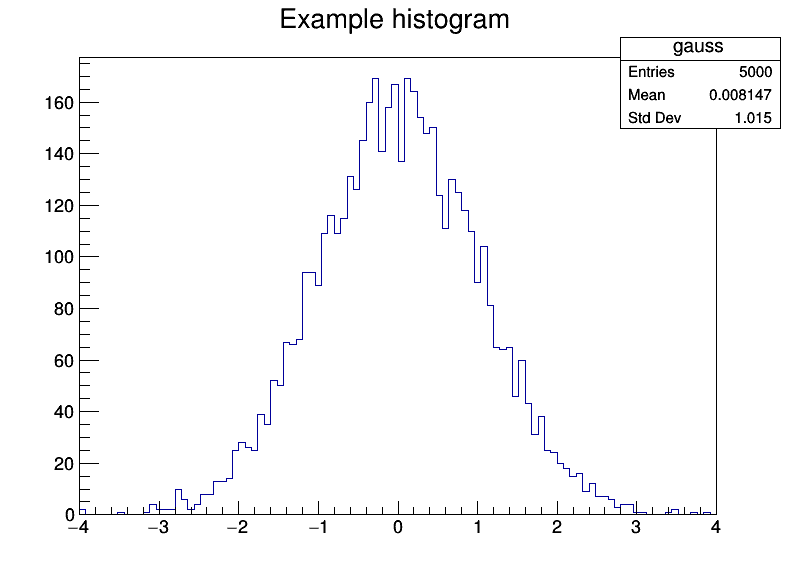

In [3]:
#Now we can check if we have everything working as we expect: 


ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libMathMore.so')
#Import brings the ROOT framework into our python environment.
import ROOT
#We define a 1 dimensional histogram, with 100 bins which ranges from -4 to +4



#Fill the histogram with gaussian (random) distribution
h.FillRandom("gaus")
#make a Canvas (i.e. a drawing)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
#Draw my histogram
h.Draw()
#Show me the canvas
c.Draw()

All being well - this should give no errors and we should have some kind of Gaussian distribution above.

The next step is to get our data from CERN:

In [4]:
ctypes.cdll.LoadLibrary('/content/APPS/root/lib/libGraf3d.so')
!mkdir -p DATA && cd DATA  && wget http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root

--2020-03-09 12:10:55--  http://opendata.cern.ch/record/4900/files/B2HHH_MagnetUp.root
Resolving opendata.cern.ch (opendata.cern.ch)... 188.184.28.138, 188.185.82.144, 188.184.93.89, ...
Connecting to opendata.cern.ch (opendata.cern.ch)|188.184.28.138|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444723234 (424M) [application/octet-stream]
Saving to: ‘B2HHH_MagnetUp.root’

B2HHH_MagnetUp.root 100%[===================>] 424.12M  10.6MB/s    in 50s     

2020-03-09 12:11:46 (8.52 MB/s) - ‘B2HHH_MagnetUp.root’ saved [444723234/444723234]




RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt

[#1] INFO:Eval -- RooTreeDataStore::loadValues(data) Ignored 3238126 out of range events


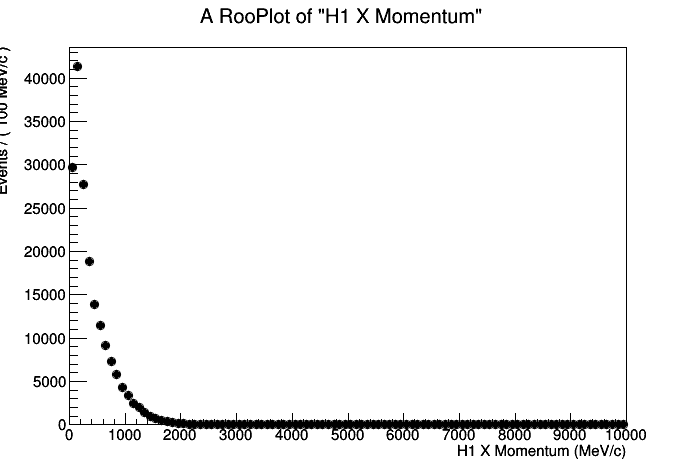

In [5]:
#Since we need to use ROOT, we must first import this into Python:
import ROOT
#Then we open the ROOT file using the TFile command.
f = ROOT.TFile.Open("DATA/B2HHH_MagnetUp.root", "READONLY")
#From our file, we have to extract the DecayTree 
tree=f.Get("DecayTree")
#Now we can grab some variables as a test:
ymomentum = ROOT.RooRealVar("H1_PY","H1 Y Momentum",0,10000,"MeV/c")
xmomentum = ROOT.RooRealVar("H1_PX","H1 X Momentum",0,10000,"MeV/c")
zmomentum = ROOT.RooRealVar("H1_PZ","H1 Z Momentum",0,10000,"MeV/c")
# test = ROOT.RooRealVar('H1_PX','H1 X Momentum',0,10000,'MeV/c')
# ss = ROOT.RooDataSet('data','data set',tree,ROOT.RooArgSet(test),'1==1')
# We then create a dataset for us to play with
data = ROOT.RooDataSet("data","data set", tree, ROOT.RooArgSet(xmomentum,ymomentum,zmomentum), "1==1")
# Now we create a canvas, plot our data onto the canvas and draw it:
c = ROOT.TCanvas("c","c")
frame = xmomentum.frame()
data.plotOn(frame)
frame.Draw()
c.Draw()

#Why are we here?

This week is about finding out something about one of the fundemental questions in physics. Why do we have "stuff".

According to many of our models, and according to many measurements in particle physics, matter and anti-matter appear to be produced in equal quantities.

However, when one looks at the Universe in general, we have more matter than anti-matter left - so there need to be some processes where anti-matter and matter are not produced equally. You can find out more about the Matter/Anti-Matter Asymmetry [here](http://press.web.cern.ch/backgrounders/matterantimatter-asymmetry)

One place we look for this asymetry is in [charge-partity (CP) violation](https://www.symmetrymagazine.org/article/october-2005/explain-it-in-60-seconds) in particle physics processes. This essentially says that the processes that happen in the anti-particle version of a decay do not **exactly** match to the processes that happen in the particle version of the decay.



---



At LHCb, we produce both particle of the  B<sup>+</sup> meson and it's antiparticle the B<sup>-</sup> meson.

We cannot detect these mesons directly. They decay into other things before we have a chance to measure them properly. So we collect data on the decay products, often called daughter particles. There are 524 [documented](http://pdg.lbl.gov/2014/listings/rpp2014-list-B-plus-minus.pdf) ways that the B<sup>+/-</sup> decays into various combinations. In order to simplify the process, we choose decay combinations that are convenient or have particular properties.

In this analysis, we will take the process:-

B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>


To do so, we are given the following data for each event in our system:-

![alt text](https://raw.githubusercontent.com/lhcb/opendata-project/80d64a3796e593fc8f9b257e85f32ae2e54f131f/Images/Variables.png)

Here, H1 is the detected daughter particle (so a Kaon or a Pion), **not** the B-meson - the mother particle. We have to use some detective work to extract the information we need on the original physics process at play.


Let's get started with working with this data:

For our analysis, the momentum of each of the daughter particles is split into the three cartesian components. We need to first combine this into a single measurement

In [6]:
#We need to tell Python what the total momentum is defined as mathematically - do that in this code block:

#Hint: I suggest we define a function which we might want to use later - something like:

def p_daughter(daughter):
  p_tot = "(sqrt("+daughter+"_PX**2+"+daughter+"_PY**2+"+daughter+"_PZ**2))"

  return p_tot

p_daughter('H1')


'(sqrt(H1_PX**2+H1_PY**2+H1_PZ**2))'

Now plot the total momentum for one (or more) of the daughter particles.

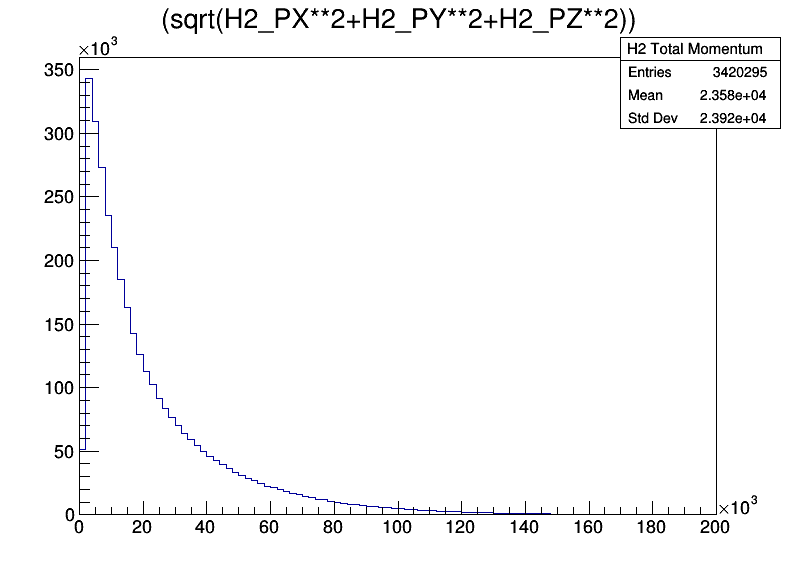

In [7]:
''' PLotting momentum of one of the daughter particles'''

#Change variable to the name of the daughter particle needed
particle = 'H2' 

c = ROOT.TCanvas("MomentumDaughter","Momentum of Daughter Particle: "+particle,800,600)

tree.Draw(p_daughter(particle)+">>"+particle+" Total Momentum(100,0,200000)")

histogram1 = ROOT.gDirectory.Get(particle+" Total Momentum")

c.Draw()


The next step is to use the total momentum of the Kaon and its invarient mass (found with a small amount of research) and your relativity knowledge to get an equation for the energy of the Kaon. 

In [8]:
#let's make a function to find the energy of a Kaon, if you add in the total momentum found in the previous steps - you should be able to do so reasonably easily

def EnergyKaon(a):
  MK = '493.677'
  return "sqrt("+p_daughter(a)+"**2 + ("+MK+")**2)"
  
EnergyKaon('H1')



'sqrt((sqrt(H1_PX**2+H1_PY**2+H1_PZ**2))**2 + (493.677)**2)'

Energy of the Mother particle: sqrt((sqrt(H1_PX**2+H1_PY**2+H1_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H2_PX**2+H2_PY**2+H2_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H3_PX**2+H3_PY**2+H3_PZ**2))**2 + (493.677)**2)


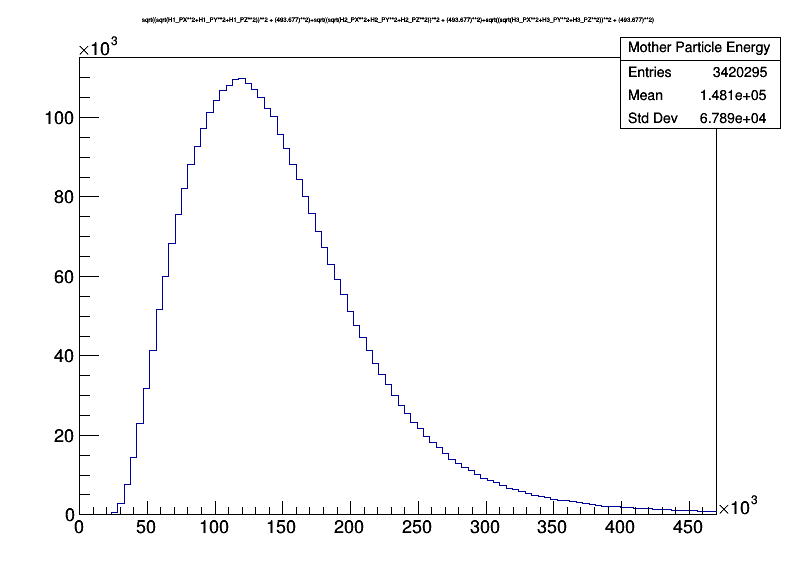

In [9]:
'''Plotting the energy of the mother particle'''

Mom_Energy = EnergyKaon('H1')+"+"+EnergyKaon('H2')+"+" +EnergyKaon('H3')
print("Energy of the Mother particle: "+ Mom_Energy)
c = ROOT.TCanvas("BMesonEnergy","Mother Particle Energy",800,600)

tree.Draw(Mom_Energy+">>Mother Particle Energy(100,0,470000)")

histogram1 = ROOT.gDirectory.Get("Mother Particle Energy")

c.Draw()

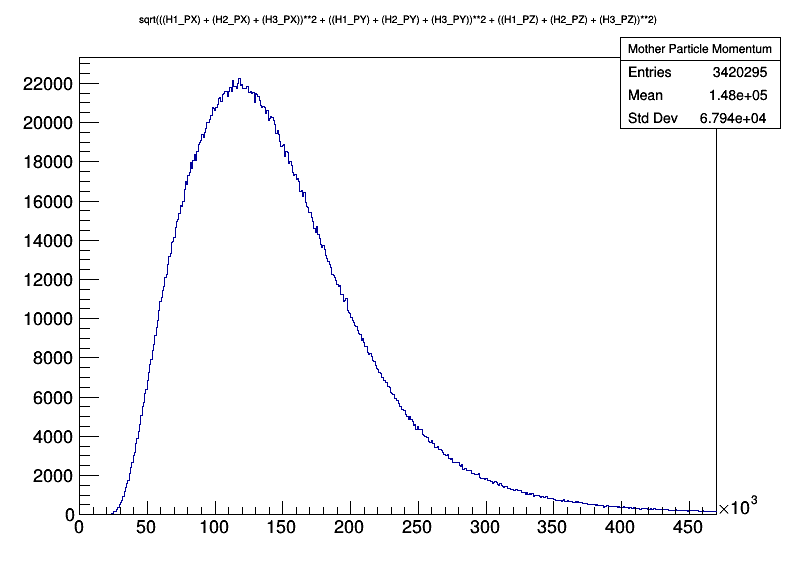

In [10]:
''' Plotting the total momentum of the mother particle'''

Bpx = "((H1_PX) + (H2_PX) + (H3_PX))"
Bpy = "((H1_PY) + (H2_PY) + (H3_PY))"
Bpz = "((H1_PZ) + (H2_PZ) + (H3_PZ))"

Mom_Ptot = "sqrt("+Bpx+"**2 + "+Bpy+"**2 + "+Bpz+"**2)"



c = ROOT.TCanvas("BMesonMomentum","Mother Particle Momentum",800,600)
#This string (below) is the total momentum of the H1 particle
tree.Draw(Mom_Ptot+">>Mother Particle Momentum(500,0,470000)")
#tree.Draw("sqrt((H1_PX**2)+(H1_PY**2)+(H1_PZ**2))+>>histogram1,100")
histogram1 = ROOT.gDirectory.Get("Mother Particle Momentum")
#histogram1.Draw()
#Show me the canvas
c.Draw()

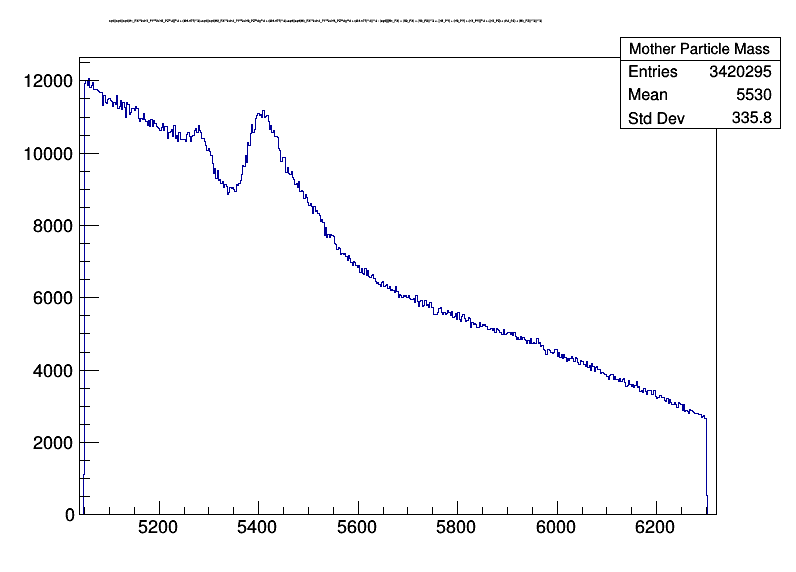

In [11]:
''' Plotting the mass of the Mother Particle'''

Mom_Mass="sqrt(("+Mom_Energy+")**2 - ("+Mom_Ptot+")**2)"

c = ROOT.TCanvas("BMesonMass","Mother Particle Mass",800,600)
tree.Draw(Mom_Mass+">>Mother Particle Mass(500,5040,6320")
histogram1 = ROOT.gDirectory.Get("Mother Particle Mass")

c.Draw()

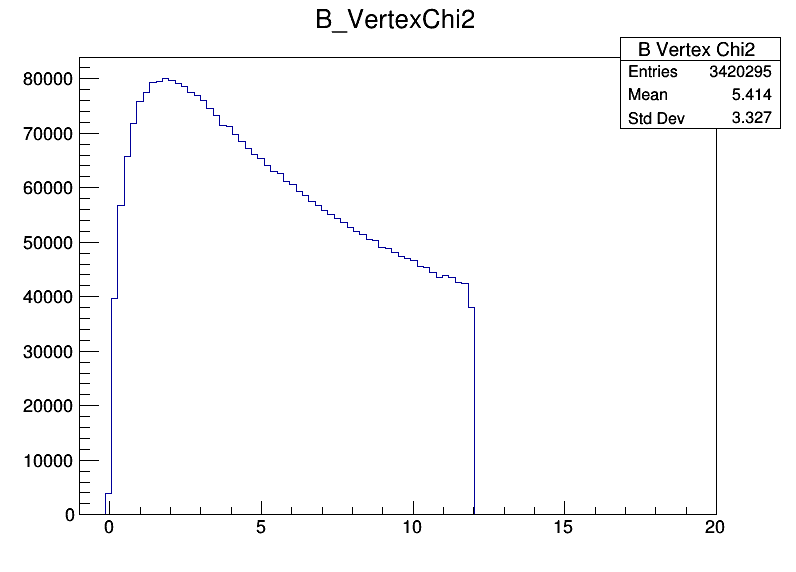

In [52]:

e=ROOT.TCanvas("B_Vertex_Chi2","B Vertex Chi2",800,600)
tree.Draw("B_VertexChi2"+">>B Vertex Chi2(100,-1,20)")
histogram1 = ROOT.gDirectory.Get("histogram")
e.Draw()

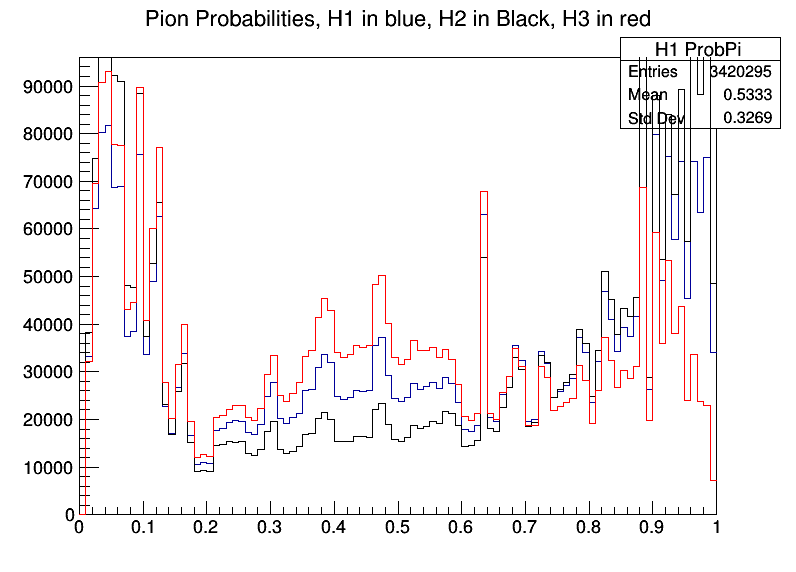

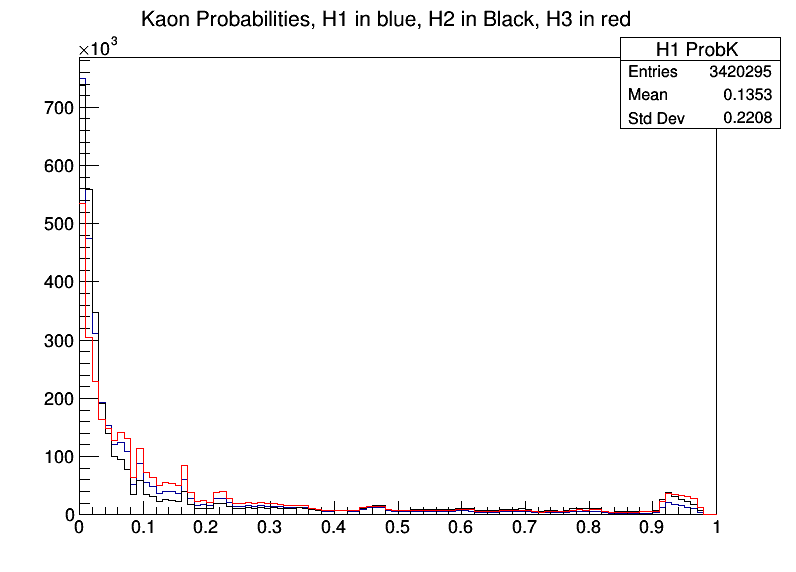

In [12]:
"Plotting ProbK and ProbPi of all daughter particles"

c = ROOT.TCanvas("PionProbs","Probability of being a Pion",800,600)

tree.Draw('H1_ProbPi'+">>H1 ProbPi(100,0,1")
tree.Draw('H2_ProbPi'+">>H2 ProbPi(100,0,1")
tree.Draw('H3_ProbPi'+">>H3 ProbPi(100,0,1")


histogram1 = ROOT.gDirectory.Get("H1 ProbPi")
histogram2 = ROOT.gDirectory.Get("H2 ProbPi")
histogram3 = ROOT.gDirectory.Get("H3 ProbPi")

histogram1.SetTitle("Pion Probabilities, H1 in blue, H2 in Black, H3 in red")

histogram1.Draw() #blue

histogram2.SetLineColor(1) #black
histogram2.Draw('Same')

histogram3.SetLineColor(2) #red
histogram3.Draw('Same')


c.Draw()

b = ROOT.TCanvas("KaonProbs","Probability of being a Kaon",800,600)
tree.Draw('H1_ProbK'+">>H1 ProbK(100,0,1")
tree.Draw('H2_ProbK'+">>H2 ProbK(100,0,1")
tree.Draw('H3_ProbK'+">>H3 ProbK(100,0,1")

histogram1 = ROOT.gDirectory.Get("H1 ProbK")
histogram2 = ROOT.gDirectory.Get("H2 ProbK")
histogram3 = ROOT.gDirectory.Get("H3 ProbK")

histogram1.SetTitle("Kaon Probabilities, H1 in blue, H2 in Black, H3 in red")
histogram1.Draw() #blue

histogram2.SetLineColor(1) #black
histogram2.Draw('Same')

histogram3.SetLineColor(2) #red
histogram3.Draw('Same')


b.Draw()


We can see from the probability plots that a select amount of particles have more than 0.9 chance of being a Kaon, setting ProbK to > 0.9 in the selection seems lika a good idea. No need to specifiy probPi as it will be necessarily < 0.1 already.

H1_ProbK>0.9&H2_ProbK>0.9&H3_ProbK>0.9&!H1_isMuon


Warning in <TCanvas::Constructor>: Deleting canvas with same name: comparedMass
Warning in <TCanvas::Constructor>: Deleting canvas with same name: SelectedMass


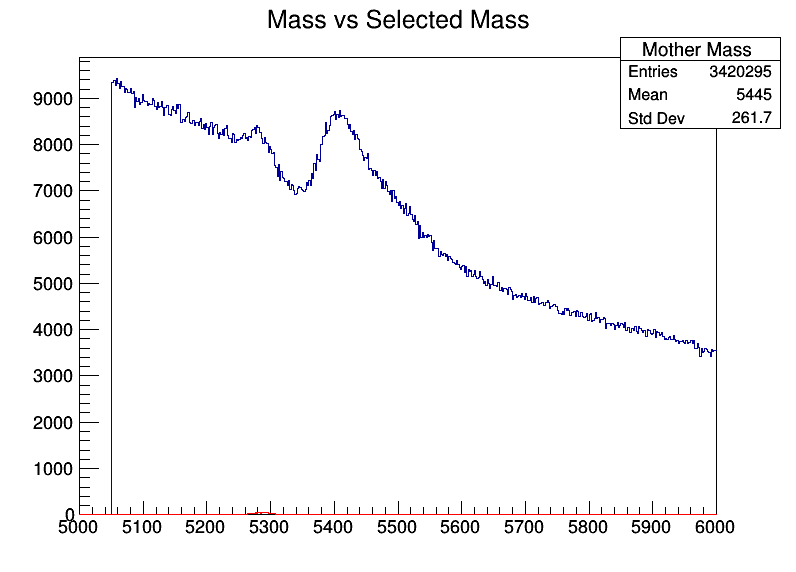

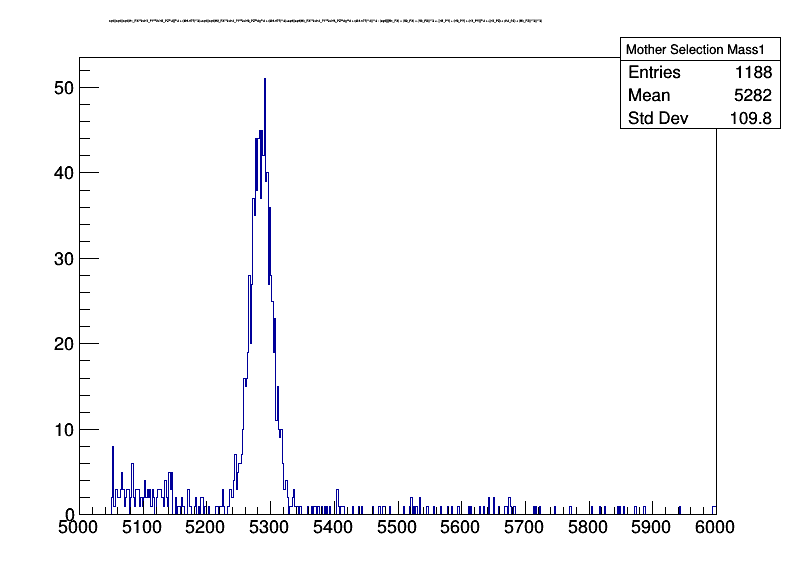

In [53]:
'''PLotting mass of selected mother particles'''

selection=("H1_ProbK>0.9&H2_ProbK>0.9&H3_ProbK>0.9&!H1_isMuon")
print(selection)

CutTree=tree.CopyTree(selection)

c = ROOT.TCanvas("comparedMass","comapred_Mass",800,600)

CutTree.Draw(Mom_Mass + ">>Mother Selection Mass(500,5000,6000)")
tree.Draw(Mom_Mass + ">>Mother Mass(500,5000,6000)")


histogram = ROOT.gDirectory.Get("Mother Mass")
histogram2 = ROOT.gDirectory.Get("Mother Selection Mass")

histogram.SetTitle("Mass vs Selected Mass")
histogram.Draw()
histogram2.SetLineColor(2)
histogram2.Draw('same')
c.Draw()

b= ROOT.TCanvas("SelectedMass","Selected_Mass",800,600)
CutTree.Draw(Mom_Mass + ">>Mother Selection Mass1(500,5000,6000)")

mass_histogram = ROOT.gDirectory.Get("Mother Selection Mass1")
 
b.Draw()

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(B_Mass): fit range of variable sqrt((sqrt((sqrt(H1_PX**2+H1_PY**2+H1_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H2_PX**2+H2_PY**2+H2_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H3_PX**2+H3_PY**2+H3_PZ**2))**2 + (493.677)**2))**2 - (sqrt(((H1_PX) + (H2_PX) + (H3_PX))**2 + ((H1_PY) + (H2_PY) + (H3_PY))**2 + ((H1_PZ) + (H2_PZ) + (H3_PZ))**2))**2) expanded to nearest bin boundaries: [5000,5500] --> [5000,5500]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss,Bkgnd)
 **********
 **  163 **SET PRINT           1
 **********
 **********
 **  164 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Signal Fraction   1.00000e-01  5.00000e-02    0.00000e+00  1.00000e+00
     2 exponent    -2.00000e-02  4.00000e-01   -2.00000e+00  2.00000e+00
     3 gauss_mean   5.3

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


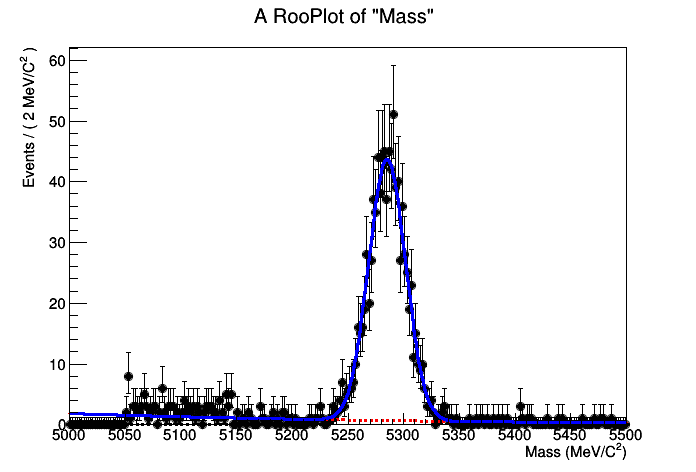

In [80]:
mass = ROOT.RooRealVar(Mom_Mass,"Mass",5000,5500,"MeV/C^{2}")
gauss_mean = ROOT.RooRealVar("gauss_mean","Mean",5300,5200,5350)
gauss_width = ROOT.RooRealVar("gauss_width","Width",3,0,60)
Gauss=ROOT.RooGaussian("Gauss","Gaussian Signal",mass,gauss_mean,gauss_width)
exponent=ROOT.RooRealVar("exponent", "C", -0.02, -2, +2)

#Define the  model for the background:

Bkgnd=ROOT.RooExponential("Bkgnd","Exponential Background",mass,exponent)

#Now we need to combine these two functions into a single PDF (probability density function)
#and we need to add a scaling factor to fit what ratio of the two are used:

sig_frac=ROOT.RooRealVar("Signal Fraction","sigfrac", 0.1, 0, 1)

model=ROOT.RooAddPdf("Full Model","model",ROOT.RooArgList(Gauss,Bkgnd),ROOT.RooArgList(sig_frac))


data_to_fit=ROOT.RooDataHist("B_Mass", "Mass", ROOT.RooArgList(mass), mass_histogram, 1.0)

#Then we can do the fitting:

model.fitTo(data_to_fit)

c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()

data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(1),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(2),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()

c1.Update()
c1.Draw()



(H1_Charge+H2_Charge+H3_Charge)>0


Warning in <TCanvas::Constructor>: Deleting canvas with same name: B+Mass
Warning in <TCanvas::Constructor>: Deleting canvas with same name: B-Mass


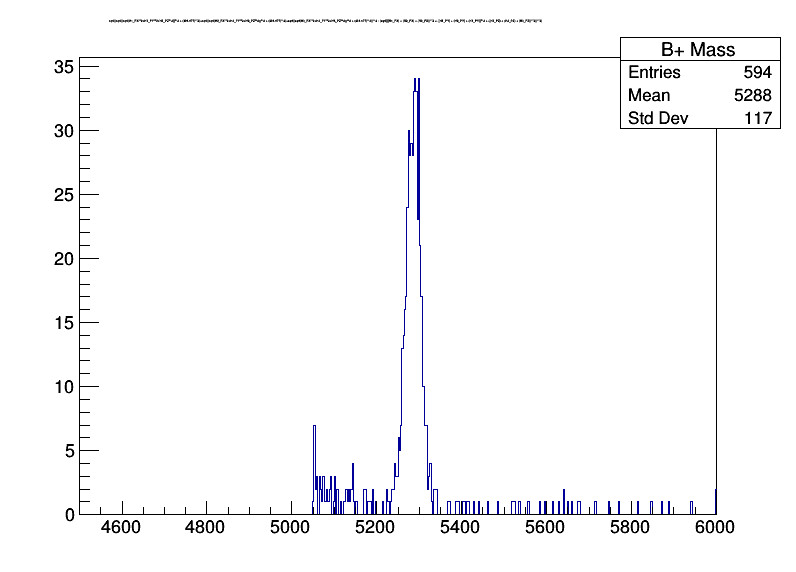

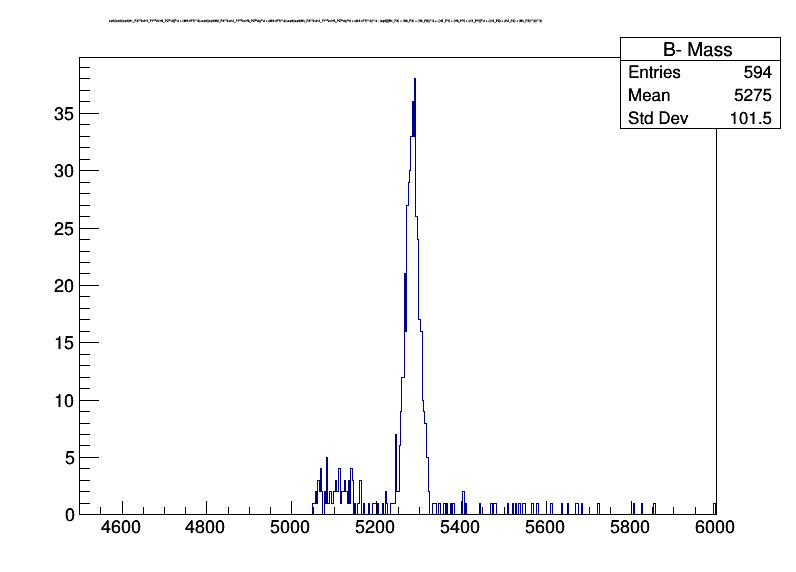

In [74]:
'''PLotting mass of B+ mother particles'''

selection=("(H1_Charge+H2_Charge+H3_Charge)>0")
print(selection)

CutTree1=CutTree.CopyTree(selection)

c = ROOT.TCanvas("B+Mass","B+_Mass",800,600)

CutTree1.Draw(Mom_Mass + ">>B+ Mass(500,4500,6000)")

bplusmass_histo = ROOT.gDirectory.Get("B+ Mass")

c.Draw()

'''PLotting mass of B- mother particles'''

selection=("(H1_Charge+H2_Charge+H3_Charge)<0")


CutTree2=CutTree.CopyTree(selection)

b = ROOT.TCanvas("B-Mass","B-_Mass",800,600)

CutTree2.Draw(Mom_Mass + ">>B- Mass(500,4500,6000)")

bminusmass_histo = ROOT.gDirectory.Get("B- Mass")

b.Draw()

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(B+_Mass): fit range of variable sqrt((sqrt((sqrt(H1_PX**2+H1_PY**2+H1_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H2_PX**2+H2_PY**2+H2_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H3_PX**2+H3_PY**2+H3_PZ**2))**2 + (493.677)**2))**2 - (sqrt(((H1_PX) + (H2_PX) + (H3_PX))**2 + ((H1_PY) + (H2_PY) + (H3_PY))**2 + ((H1_PZ) + (H2_PZ) + (H3_PZ))**2))**2) expanded to nearest bin boundaries: [4998,5502] --> [4998,5502]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss,Bkgnd)
 **********
 **  154 **SET PRINT           1
 **********
 **********
 **  155 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Signal Fraction   7.90576e-01  1.93654e-02    0.00000e+00  1.00000e+00
     2 exponent    -3.78387e-03  7.41297e-04   -2.00000e+00  2.00000e+00
     3 gauss_mean   5.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


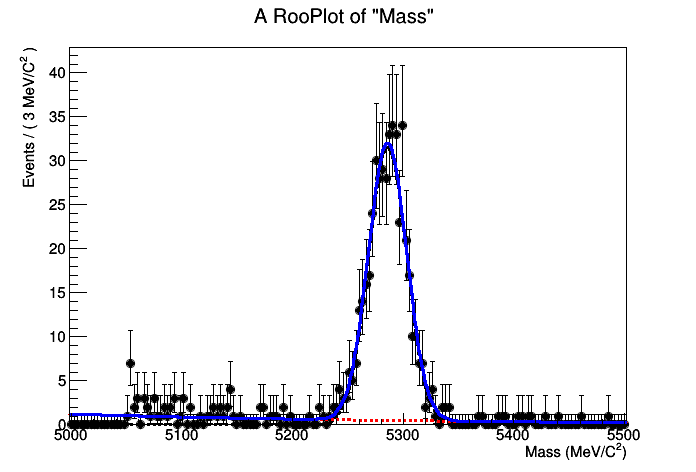

In [79]:
'''Fitting B+''' 

data_to_fit = ROOT.RooDataHist("B+_Mass", "Mass", ROOT.RooArgList(mass), bplusmass_histo, 1.0)
#Then we can do the fitting:

model.fitTo(data_to_fit)

c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(1),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(2),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()
c1.Draw()

[#1] INFO:DataHandling -- RooDataHist::adjustBinning(B-_Mass): fit range of variable sqrt((sqrt((sqrt(H1_PX**2+H1_PY**2+H1_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H2_PX**2+H2_PY**2+H2_PZ**2))**2 + (493.677)**2)+sqrt((sqrt(H3_PX**2+H3_PY**2+H3_PZ**2))**2 + (493.677)**2))**2 - (sqrt(((H1_PX) + (H2_PX) + (H3_PX))**2 + ((H1_PY) + (H2_PY) + (H3_PY))**2 + ((H1_PZ) + (H2_PZ) + (H3_PZ))**2))**2) expanded to nearest bin boundaries: [4998,5502] --> [4998,5502]
[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (Gauss,Bkgnd)
 **********
 **  145 **SET PRINT           1
 **********
 **********
 **  146 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 Signal Fraction   8.16519e-01  1.89400e-02    0.00000e+00  1.00000e+00
     2 exponent    -3.12512e-03  7.72163e-04   -2.00000e+00  2.00000e+00
     3 gauss_mean   5.

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


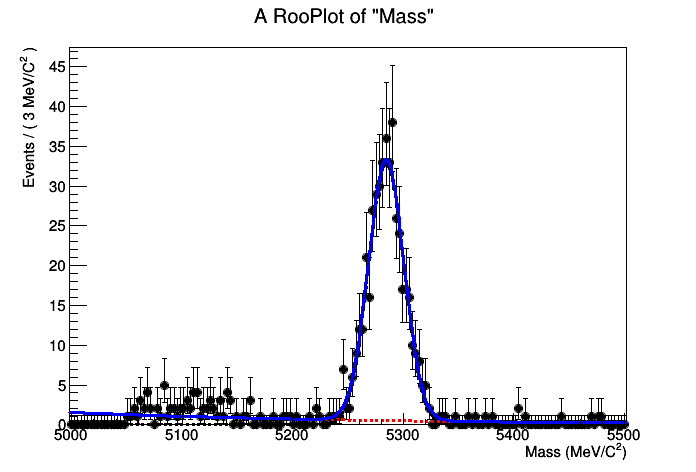

In [78]:
'''Fitting B-''' 

data_to_fit=ROOT.RooDataHist("B-_Mass", "Mass", ROOT.RooArgList(mass), bminusmass_histo, 1.0)
#Then we can do the fitting:

model.fitTo(data_to_fit)

c1=ROOT.TCanvas("c1","c1")
frame=mass.frame()
data_to_fit.plotOn(frame)
model.plotOn(frame, ROOT.RooFit.Components("Gauss"),ROOT.RooFit.LineColor(1),ROOT.RooFit.LineStyle(2))
model.plotOn(frame, ROOT.RooFit.Components("Bkgnd"),ROOT.RooFit.LineColor(2),ROOT.RooFit.LineStyle(2))
model.plotOn(frame)
frame.Draw()
c1.Update()
c1.Draw()

#Counting

So we have now loaded our data; we have reconstructed information about the mother B meson and we have cut away any data which looks like it might not be what we are looking for. We have then plotted histograms of the mass of the B meson and used this to fit a model, a function to describe the events there. We now have to identify which of our events belong to the B<sup>+</sup> and how many of them belong to B<sup>-</sup>.

To do this, should split out data into two groups (and throw away data which doesn't comply with either decay)

We will be looking for the events which are


B<sup>+</sup>->K<sup>+</sup> + K<sup>+</sup>  + K<sup>-</sup>

or

B<sup>-</sup>->K<sup>-</sup> + K<sup>-</sup>  + K<sup>+</sup>

We can look for the number of positive and negative charges in H1, H2 and H3 (using the variable ```H1_Charge```). If we have 0 or 3 positive charges, we should throw the event away and if we have 1 it should be assigned be a B<sup>-</sup>, with 2 it should be a B<sup>+</sup>

Once we have defined if it's a B<sup>+</sup> or a B <sup>-</sup>, we should go ahead and ensure the pre-selection is applied and then plot our B mass, and fit the model to find the yield.

We can then calculate the assymetry from this equation:

$A=\frac{(N^{B-}-N^{B+})}{(N^{B-}+N^{B+})}$

Where N<sup>B+/- </sup> is the number of events found from the fitted yield of the signal from each data set.

The uncertainty on this result is given by:

$\sigma_A=\sqrt\frac{1-A^2}{N^{B-}+N^{B+}}$

Calculate these two values for your data and print them below:

In [0]:
#Here do your calculation of the final result

#Congratulations!

You just made your first LHCb physics analysis. Does this seem like a reasonable result? Did we explain why we have an excess of mass in the Universe?

To make a further anaysis, we can look into the intermediate processes.

We have so far considered only that the B meson ultimately decays into three kaons. It may be that on the way, the B meson first decays into a Kaon and another particle, and then from that particle to two Kaons.

We would expect this to be one of three possible modes (for B<sup>+</sup>):

$R^{++} \rightarrow K_1^+ +K_2^+$

(we don't expect this to happen because of the like charges in the Kaons)

$R^0 \rightarrow K_1^+ +K_3^-$

$R^0 \rightarrow K_2^+ +K_3^-$

(Expect symmetric arrangements for B<sup>-</sup>)

To analyse the intermediate states we can measure the invarient masses of the intermediate states and then plot them on what is called a Dalitz plot (this is a 2D plot with two different two body decays (from the three body decay) on each axis)

![Dalitz Plot](https://slideplayer.com/slide/15960097/88/images/15/Dalitz+plot%3A+%CE%9B+c+%2B+%E2%86%92%F0%9D%91%9D+%F0%9D%90%BE+%E2%88%92+%F0%9D%9C%8B+%2B.jpg)


In [0]:
#Define a function to find the invarient mass of two given Kaons


In [0]:
#Then for each of the R^0 decays, find the squared invarient masses of the intermediate particle

In [0]:
#Then, ensuring you're still taking the data after the selection, make a Dalitz plot. This is a 2-D scatter plot (use e.g. TH2F to make the plot where we used TH1F before)
#Choose an appropriate binning in your scatter 

We can further improve our plot, since two sets of particles on each axis are exactly the same (one positive Kaon, one negative Kaon). So we can plot the maximum of the two values on one axis and the minimum on the other. We can use a quick numpy check and then plot those values.

In [0]:
#Make the revised Dalitz plot here for B+ mesons

In [0]:
#Make the revised Dalitz plot here for B- mesons

In [0]:
#Where we have a higher density of points (or a bigger value in the bin) this is indication of an intermediate resonance
#Check out the possible resonances you have found in the PDG (http://pdg.lbl.gov/2019/tables/contents_tables.html)